# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [ ]:
import re
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
import pickle

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Data Understanding

In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! pip install --upgrade kaggle
! kaggle datasets download -d joebeachcapital/restaurant-reviews

cp: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews
License(s): DbCL-1.0
  0% 0.00/1.23M [00:00<?, ?B/s]
100% 1.23M/1.23M [00:00<00:00, 21.9MB/s]


In [ ]:
! unzip restaurant-reviews.zip

Archive:  restaurant-reviews.zip
  inflating: Restaurant reviews.csv  


In [ ]:
data = pd.read_csv('Restaurant reviews.csv')

In [ ]:
data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [ ]:
data = data.dropna(subset=['Review', 'Rating'])

In [ ]:
duplicate = data[data.duplicated(keep=False)]
print("\nData yang duplikat:")
print(duplicate[['Reviewer', 'Review']])


Data yang duplikat:
Empty DataFrame
Columns: [Reviewer, Review]
Index: []


semua review berasal dari orang yang berbeda

In [ ]:
data = data.drop(columns=['Restaurant', 'Reviewer', 'Metadata', 'Time', 'Pictures', '7514'])

In [ ]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

In [ ]:
data.isna().sum()

,0
Review,0
Rating,1


In [ ]:
data = data.dropna(subset=['Rating'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9954 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  9954 non-null   object 
 1   Rating  9954 non-null   float64
dtypes: float64(1), object(1)
memory usage: 233.3+ KB


In [ ]:
data['Review'].duplicated().sum()

591

In [ ]:
duplicate = data[data.duplicated(keep=False)]
print("\nData yang duplikat:")
print(duplicate)


Data yang duplikat:
                 Review  Rating
348   delivered on time     5.0
367            not good     1.0
743   delivered on time     5.0
756        good service     5.0
777          good taste     5.0
...                 ...     ...
9879               good     5.0
9883               Good     5.0
9890      fast delivery     5.0
9891   Food was awesome     5.0
9894               good     5.0

[644 rows x 2 columns]


In [ ]:
data.drop_duplicates(subset=['Review'], keep='first')

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4.0


In [ ]:
data['Rating'] = data['Rating'].astype(float).astype(int)

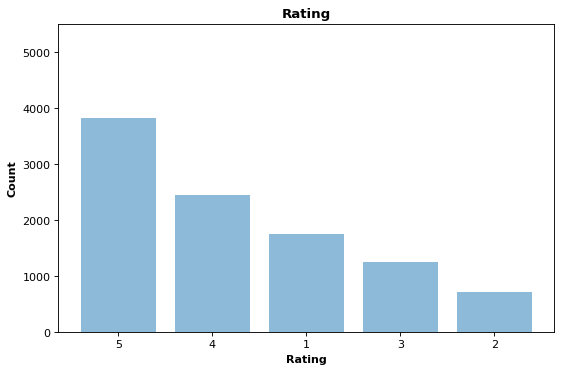

In [ ]:
height = data['Rating'].value_counts()
labels = data['Rating'].unique()
y_pos = np.arange(len(labels))

plt.figure(figsize=(8,5), dpi=80)
plt.ylim(0,5500)
plt.title('Rating', fontweight='bold')
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.bar(y_pos, height, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

# Case Folding

In [ ]:
def contains_emoticon(text):
    emoticon_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return bool(emoticon_pattern.search(text))

data['contains_emoticon'] = data['Review'].apply(contains_emoticon)
print(data['contains_emoticon'].value_counts())

contains_emoticon
False    9246
True      708
Name: count, dtype: int64


In [ ]:
def remove_emoticon(text):
    emoticon_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)


cleaned_review = data['Review'].apply(remove_emoticon)
print(cleaned_review)

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object


In [ ]:
data['cleaned_review'] = data['Review'].apply(remove_emoticon)

In [ ]:
def casefolding(text):
  text = text.lower()                               # Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
  text = text.strip()
  return text

In [ ]:
raw_review = data['cleaned_review'].iloc[5]
case_folding = casefolding(raw_review)

print('Raw data\t: ', raw_review)
print('Case folding\t: ', case_folding)

Raw data	:  Ambiance is good, service is good, food is aPradeecp and subro best service
Food is good. Papiya good hostess and ur caption very good. This is 4star restaurant.
Case folding	:  ambiance is good, service is good, food is apradeecp and subro best service
food is good. papiya good hostess and ur caption very good. this is 4star restaurant.


# Word Normalization & Lemmatization



In [ ]:
normalization_dict = {
    "n't": "not",
    "'re": "are",
    "'ve": "have",
    "'ll": "will",
    "'d": "would",
    "'m": "am"
}

In [ ]:
def word_normalization(text):
    words = text.split()
    normalized_words = [normalization_dict[word] if word in normalization_dict else word for word in words]
    return ' '.join(normalized_words)

data['normalized_review'] = data['cleaned_review'].apply(word_normalization)

In [ ]:
def get_wordnet_pos(word):
    from nltk.corpus import wordnet
    from nltk import pos_tag
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_words)

data['lemmatized_review'] = data['normalized_review'].apply(lemmatize_text)

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

data['filtered_review'] = data['lemmatized_review'].apply(remove_stopwords)

In [ ]:
raw_review = data['cleaned_review'].iloc[5]
case_folding = casefolding(raw_review)
normalization = word_normalization(case_folding)
lemmatization = lemmatize_text(normalization)
stopwords = remove_stopwords(lemmatization)

print('Raw data\t: ', raw_review)
print('Case folding\t: ', case_folding)
print('Normalization\t: ', normalization)
print('Lemmatization\t: ', lemmatization)
print('Stopwords\t: ', stopwords)

Raw data	:  Ambiance is good, service is good, food is aPradeecp and subro best service
Food is good. Papiya good hostess and ur caption very good. This is 4star restaurant.
Case folding	:  ambiance is good, service is good, food is apradeecp and subro best service
food is good. papiya good hostess and ur caption very good. this is 4star restaurant.
Normalization	:  ambiance is good, service is good, food is apradeecp and subro best service food is good. papiya good hostess and ur caption very good. this is 4star restaurant.
Lemmatization	:  ambiance be good, service be good, food be apradeecp and subro best service food be good. papiya good hostess and ur caption very good. this be 4star restaurant.
Stopwords	:  ambiance good, service good, food apradeecp subro best service food good. papiya good hostess ur caption good. 4star restaurant.


# Pre-Processing

In [ ]:
def text_preprocessing(text):
    text = remove_emoticon(text)
    text = casefolding(text)
    text = word_normalization(text)
    text = lemmatize_text(text)
    text = remove_stopwords(text)
    return text

In [ ]:
%%time
data['preprocessed_review'] = data['Review'].apply(text_preprocessing)

CPU times: user 30.3 s, sys: 97.9 ms, total: 30.4 s
Wall time: 30.6 s


In [ ]:
data.head()

,Review,Rating,contains_emoticon,cleaned_review,normalized_review,lemmatized_review,filtered_review,preprocessed_review
0,"The ambience was good, food was quite good . h...",5,False,"The ambience was good, food was quite good . h...","The ambience was good, food was quite good . h...","The ambience be good, food be quite good . hav...","The ambience good, food quite good . Saturday ...","ambience good, food quite good . saturday lunc..."
1,Ambience is too good for a pleasant evening. S...,5,False,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening. S...,Ambience be too good for a pleasant evening. S...,Ambience good pleasant evening. Service prompt...,ambience good pleasant evening. service prompt...
2,A must try.. great food great ambience. Thnx f...,5,False,A must try.. great food great ambience. Thnx f...,A must try.. great food great ambience. Thnx f...,A must try.. great food great ambience. Thnx f...,A must try.. great food great ambience. Thnx s...,must try.. great food great ambience. thnx ser...
3,Soumen das and Arun was a great guy. Only beca...,5,False,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy. Only beca...,Soumen da and Arun be a great guy. Only becaus...,Soumen da Arun great guy. Only behavior sincer...,"soumen da arun great guy. behavior sincerety, ..."
4,Food is good.we ordered Kodi drumsticks and ba...,5,False,Food is good.we ordered Kodi drumsticks and ba...,Food is good.we ordered Kodi drumsticks and ba...,Food be good.we order Kodi drumstick and baske...,Food good.we order Kodi drumstick basket mutto...,food good.we order kodi drumstick basket mutto...


In [ ]:
data.to_csv('preprocessed_data.csv', index=False)

In [ ]:
X = data['preprocessed_review']
y = data['Rating']

In [ ]:
X

,preprocessed_review
0,"ambience good, food quite good . saturday lunc..."
1,ambience good pleasant evening. service prompt...
2,must try.. great food great ambience. thnx ser...
3,"soumen da arun great guy. behavior sincerety, ..."
4,food good.we order kodi drumstick basket mutto...
...,...
9995,madhumathi mahajan well start nice courteous s...
9996,"place never disappointed us.. food, courteous ..."
9997,"bad rating mainly ""chicken bone found veg food..."
9998,personally love prefer chinese food. couple ti...


In [ ]:
y

,Rating
0,5
1,5
2,5
3,5
4,5
...,...
9995,3
9996,4
9997,1
9998,4


# Feature Extraction (Bag of Words & N-gram)

In [ ]:
# BoW - Unigram
bow = CountVectorizer(ngram_range=(1,1))
bow.fit(X)

CountVectorizer()

In [ ]:
print(len(bow.get_feature_names_out()))

13869


In [ ]:
print(bow.get_feature_names_out())

['00' '00p' '00pm' ... 'zyada' 'ànd' 'éclat']


In [ ]:
X_bow = bow.transform(X).toarray()
X_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
with open('bow_feature.pickle', 'wb') as output:
  pickle.dump(X_bow, output)

# Feature Extraction (TF-IDF & N-gram)

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
print(len(tf_idf.get_feature_names_out()))

13869


In [ ]:
print(tf_idf.get_feature_names_out())

['00' '00p' '00pm' ... 'zyada' 'ànd' 'éclat']


In [ ]:
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,00,00p,00pm,03,03am,04,05,05th,06,07pm,...,zomoto,zomtato,zomto,zone,zoomato,zucchini,zx14r,zyada,ànd,éclat
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

# Feature Extraction

In [ ]:
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
chi2_features = SelectKBest(chi2, k=1000)
X_kbest_features = chi2_features.fit_transform(X, y)

print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 13869
Reduced feature number: 1000


In [ ]:
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.663919
1,2.424266
2,2.475778
3,0.485580
4,0.827886
...,...
13864,0.140541
13865,0.120501
13866,0.844017
13867,3.352851


In [ ]:
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.663919,00
1,2.424266,00p
2,2.475778,00pm
3,0.485580,03
4,0.827886,03am
...,...,...
13864,0.140541,zucchini
13865,0.120501,zx14r
13866,0.844017,zyada
13867,3.352851,ànd


In [ ]:
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
1342,474.118959,bad
5368,168.126660,good
1282,115.550397,awesome
4440,112.753491,excellent
13428,112.336608,waste
...,...,...
2963,0.073645,conference
3332,0.061845,cumin
10494,0.052782,rogan
4859,0.031655,folk


In [ ]:
mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [ ]:
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['20',
 '210',
 '2450',
 '25',
 '25mins',
 '25rs',
 '30',
 '3bs',
 '40',
 '45',
 '4hrs',
 '649',
 '699',
 '6pc',
 '783',
 '___',
 'ab',
 'absolute',
 'absolutely',
 'ac',
 'accept',
 'acceptable',
 'accepted',
 'accord',
 'action',
 'address',
 'advise',
 'affordable',
 'afternoon',
 'aimbence',
 'ala',
 'ali',
 'all',
 'allow',
 'almost',
 'along',
 'also',
 'although',
 'always',
 'amaze',
 'amazing',
 'ambiance',
 'ambience',
 'ambiens',
 'andhra',
 'answer',
 'anyone',
 'anything',
 'apart',
 'apology',
 'appreciate',
 'area',
 'argue',
 'argument',
 'arrive',
 'arrogance',
 'arrogant',
 'asian',
 'ask',
 'atleast',
 'attentive',
 'attitude',
 'authentic',
 'available',
 'average',
 'avg',
 'avialble',
 'avoid',
 'awesome',
 'awful',
 'awsome',
 'baaaad',
 'bad',
 'bade',
 'bags',
 'bahadur',
 'bakery',
 'bamboo',
 'barely',
 'bargain',
 'barnali',
 'bdubs',
 'bearable',
 'beautiful',
 'beer',
 'before',
 'begumpet',
 'behave',
 'bekar',
 'belies',
 'berger',
 'best',
 'better',
 '

In [ ]:
tf_idf.vocabulary_

{'ambience': 793,
 'good': 5368,
 'food': 4874,
 'quite': 9888,
 'saturday': 10769,
 'lunch': 7391,
 'cost': 3135,
 'effective': 4169,
 'place': 9346,
 'sate': 10750,
 'brunch': 2056,
 'one': 8622,
 'also': 751,
 'chill': 2567,
 'friend': 5018,
 'parents': 8999,
 'waiter': 13372,
 'soumen': 11524,
 'da': 3396,
 'really': 10086,
 'courteous': 3172,
 'helpful': 5751,
 'pleasant': 9386,
 'evening': 4394,
 'service': 10982,
 'prompt': 9696,
 'experience': 4505,
 'kudos': 6947,
 'must': 8143,
 'try': 12790,
 'great': 5459,
 'thnx': 12486,
 'pradeep': 9531,
 'subroto': 11927,
 'personal': 9212,
 'recommendation': 10137,
 'penne': 9164,
 'alfredo': 699,
 'pasta': 9055,
 'music': 8135,
 'background': 1334,
 'amazing': 777,
 'arun': 1091,
 'guy': 5551,
 'behavior': 1573,
 'sincerety': 11255,
 'course': 3168,
 'would': 13680,
 'like': 7197,
 'visit': 13306,
 'again': 629,
 'we': 13450,
 'order': 8679,
 'kodi': 6892,
 'drumstick': 4049,
 'basket': 1478,
 'mutton': 8154,
 'biryani': 1770,
 'thanks

In [ ]:
kbest_feature = {} # Buat dictionary kosong

for (k,v) in tf_idf.vocabulary_.items():    # Iterasi untuk mengulangi vocab yang dihasilkan TF_IDF
  if k in selected_feature:                 # Cek apakah fitur termasuk k fitur yang diseleksi
    kbest_feature[k] = v                    # Jika iya, simpan fitur tersebut pada dictionary kosong diatas

In [ ]:
kbest_feature

{'ambience': 793,
 'good': 5368,
 'quite': 9888,
 'lunch': 7391,
 'cost': 3135,
 'place': 9346,
 'one': 8622,
 'also': 751,
 'chill': 2567,
 'friend': 5018,
 'waiter': 13372,
 'really': 10086,
 'courteous': 3172,
 'helpful': 5751,
 'service': 10982,
 'prompt': 9696,
 'experience': 4505,
 'kudos': 6947,
 'must': 8143,
 'try': 12790,
 'great': 5459,
 'pasta': 9055,
 'music': 8135,
 'amazing': 777,
 'guy': 5551,
 'course': 3168,
 'would': 13680,
 'like': 7197,
 'visit': 13306,
 'order': 8679,
 'biryani': 1770,
 'thanks': 12414,
 'well': 13491,
 'enjoy': 4294,
 'ambiance': 786,
 'best': 1636,
 'papiya': 8969,
 'hostess': 5915,
 'restaurant': 10369,
 'nice': 8329,
 'different': 3744,
 'tasty': 12278,
 'reasonable': 10093,
 'reading': 10072,
 'review': 10414,
 'fish': 4764,
 'ok': 8578,
 'disappointed': 3815,
 'staff': 11715,
 'polite': 9438,
 'especially': 4366,
 'excellent': 4440,
 'specially': 11582,
 'spicy': 11625,
 'give': 5298,
 'overall': 8779,
 'party': 9034,
 'birthday': 1766,
 'pe

In [ ]:
data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,20,210,2450,25,25mins,25rs,30,3bs,40,45,...,yachi,yesternight,yet,yrs,yuck,yummy,zega,zero,zomato,zomoto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

naive bayes

In [ ]:
algorithm = MultinomialNB()               # Load algoritma pembelajaran tertentu
model_nb = algorithm.fit(X_train, y_train)   # Fitkan (latih) algoritman menggunakan data latih & label latih

# Simpan model hasil traning
dump(model_nb, filename='model_1.joblib')

['model_1.joblib']

In [ ]:
model_nb_pred = model_nb.predict(X_test)

model_nb_pred

array([5, 5, 5, ..., 5, 5, 5])

logistic regression

In [ ]:
algorithm = LogisticRegression(C= 1)
model_lr = algorithm.fit(X_train, y_train)

dump(model_lr, filename='model_2.joblib')

['model_2.joblib']

In [ ]:
model_lr_pred = model_lr.predict(X_test)

model_lr_pred

array([4, 5, 5, ..., 5, 4, 5])

knn

In [ ]:
algorithm = KNeighborsClassifier(n_neighbors=5)
model_knn = algorithm.fit(X_train, y_train)

dump(model_knn, filename='model_3.joblib')

['model_3.joblib']

In [ ]:
model_knn_pred = model_knn.predict(X_test)

model_knn_pred

array([5, 5, 5, ..., 5, 5, 5])

# Model Evaluation

naive bayes

In [ ]:
prediksi_benar = (model_nb_pred == y_test).sum()
prediksi_salah = (model_nb_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Accuracy pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 1211
Jumlah prediksi salah	: 780
Accuracy pengujian	: 60.823706680060276 %


In [ ]:
cm = confusion_matrix(y_test, model_nb_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[268   0   1  43  42]
 [ 54   0  10  46  25]
 [ 22   0  10 134  69]
 [  1   0   2 222 254]
 [  5   0   1  71 711]]


In [ ]:
print('Classification report:\n', classification_report(y_test, model_nb_pred))

Classification report:
               precision    recall  f1-score   support

           1       0.77      0.76      0.76       354
           2       0.00      0.00      0.00       135
           3       0.42      0.04      0.08       235
           4       0.43      0.46      0.45       479
           5       0.65      0.90      0.75       788

    accuracy                           0.61      1991
   macro avg       0.45      0.43      0.41      1991
weighted avg       0.54      0.61      0.55      1991



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


logistic regression

In [ ]:
prediksi_benar = (model_lr_pred == y_test).sum()
prediksi_salah = (model_lr_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Accuracy pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 1276
Jumlah prediksi salah	: 715
Accuracy pengujian	: 64.08839779005525 %


In [ ]:
cm = confusion_matrix(y_test, model_lr_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[294   4  17  15  24]
 [ 55   4  30  28  18]
 [ 32   5  55 101  42]
 [ 10   1  16 264 188]
 [ 14   1   6 108 659]]


In [ ]:
print('Classification report:\n', classification_report(y_test, model_lr_pred))

Classification report:
               precision    recall  f1-score   support

           1       0.73      0.83      0.77       354
           2       0.27      0.03      0.05       135
           3       0.44      0.23      0.31       235
           4       0.51      0.55      0.53       479
           5       0.71      0.84      0.77       788

    accuracy                           0.64      1991
   macro avg       0.53      0.50      0.49      1991
weighted avg       0.60      0.64      0.61      1991



knn

In [ ]:
prediksi_benar = (model_knn_pred == y_test).sum()
prediksi_salah = (model_knn_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Accuracy pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 951
Jumlah prediksi salah	: 1040
Accuracy pengujian	: 47.76494224008036 %


In [ ]:
cm = confusion_matrix(y_test, model_knn_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[151   1  20  17 165]
 [ 35   2   6  18  74]
 [ 32   4  21  26 152]
 [ 22   4  29  89 335]
 [ 19   4  16  61 688]]


In [ ]:
print('Classification report:\n', classification_report(y_test, model_knn_pred))

Classification report:
               precision    recall  f1-score   support

           1       0.58      0.43      0.49       354
           2       0.13      0.01      0.03       135
           3       0.23      0.09      0.13       235
           4       0.42      0.19      0.26       479
           5       0.49      0.87      0.62       788

    accuracy                           0.48      1991
   macro avg       0.37      0.32      0.31      1991
weighted avg       0.43      0.48      0.41      1991



In [ ]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(C=1, max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

print("Cross-Validation Results:\n" + "-"*30)
for model_name, model in models.items():
    try:
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        print(f"{model_name}:\n - Cross-validation scores: {scores}")
        print(f" - Average accuracy: {scores.mean():.4f}")
        print(f" - Standard deviation: {scores.std():.4f}\n")
    except Exception as e:
        print(f"Error with {model_name}: {e}\n")

Cross-Validation Results:
------------------------------
Naive Bayes:
 - Cross-validation scores: [0.59510358 0.59008161 0.59510358 0.60364322 0.59170854]
 - Average accuracy: 0.5951
 - Standard deviation: 0.0047

Logistic Regression:
 - Cross-validation scores: [0.61581921 0.63967357 0.62397991 0.62311558 0.6218593 ]
 - Average accuracy: 0.6249
 - Standard deviation: 0.0079

K-Nearest Neighbors:
 - Cross-validation scores: [0.45386064 0.44695543 0.45574388 0.46796482 0.45163317]
 - Average accuracy: 0.4552
 - Standard deviation: 0.0070



# Deployment

In [ ]:
pipelines = {
    "Naive Bayes": load('model_1.joblib'),
    "Logistic Regression": load('model_2.joblib'),
    "K-Nearest Neighbors": load('model_3.joblib')
}

vocab = load('kbest_feature.pickle')

In [ ]:
category_mapping = {
    1: 'very bad',
    2: 'bad',
    3: 'neutral',
    4: 'good',
    5: 'excellent'
}

In [ ]:
input_text = "the food isn't good but not bad either" #@param {type:"string"}

pre_input_text = text_preprocessing(input_text)   # lakukan text pre processing pada text input

def predict_with_models(input_text):

    tf_idf_vec = TfidfVectorizer(vocabulary=set(vocab))
    input_vector = tf_idf_vec.fit_transform([input_text])

    predictions = {}
    for model_name, model in pipelines.items():
        result = model.predict(input_vector)[0]
        predictions[model_name] = result

    return predictions

predictions = predict_with_models(pre_input_text)

print(f"\nHasil Text Preprocessing: {pre_input_text}") # Print the preprocessed text
print(f"Prediksi untuk teks: '{input_text}'")
for model_name, prediction in predictions.items():
    print(f"  - {model_name}: {prediction}")
    print(f"  - {model_name}: {category_mapping[prediction]}")


Hasil Text Preprocessing: food good bad either
Prediksi untuk teks: 'the food isn't good but not bad either'
  - Naive Bayes: 1
  - Naive Bayes: very bad
  - Logistic Regression: 1
  - Logistic Regression: very bad
  - K-Nearest Neighbors: 5
  - K-Nearest Neighbors: excellent
